In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py, os
import numpy as np
import healpy as hp

In [3]:
from msfm.utils import files
import matplotlib.pyplot as plt

In [4]:
obs_dir = "/pscratch/sd/a/athomsen/v11desy3/v14/extended/obs"
with h5py.File(os.path.join(obs_dir, "cosmo_fiducial_obs_maps_mag_0000.h5"), "r") as f:
    mag_dv = f["obs/maps"][:]
    
with h5py.File(os.path.join(obs_dir, "cosmo_fiducial_obs_maps_no_mag_0000.h5"), "r") as f:
    no_mag_dv = f["obs/maps"][:]

msfm_conf = files.load_config("/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v15/extended.yaml")
data_vec_pix, _, _, _ = files.load_pixel_file(msfm_conf)
n_pix = msfm_conf["analysis"]["n_pix"]

i_patch = 0
i_z = -1

mag_map = np.zeros(n_pix)
mag_map[data_vec_pix] = mag_dv[i_patch,:,i_z]

no_mag_map = np.zeros(n_pix)
no_mag_map[data_vec_pix] = no_mag_dv[i_patch,:,i_z]

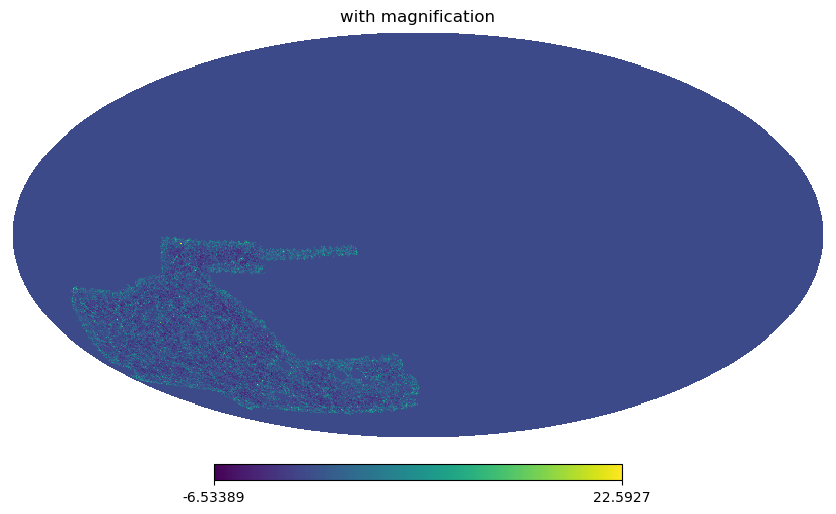

In [5]:
hp.mollview(mag_map, nest=True, title="with magnification")

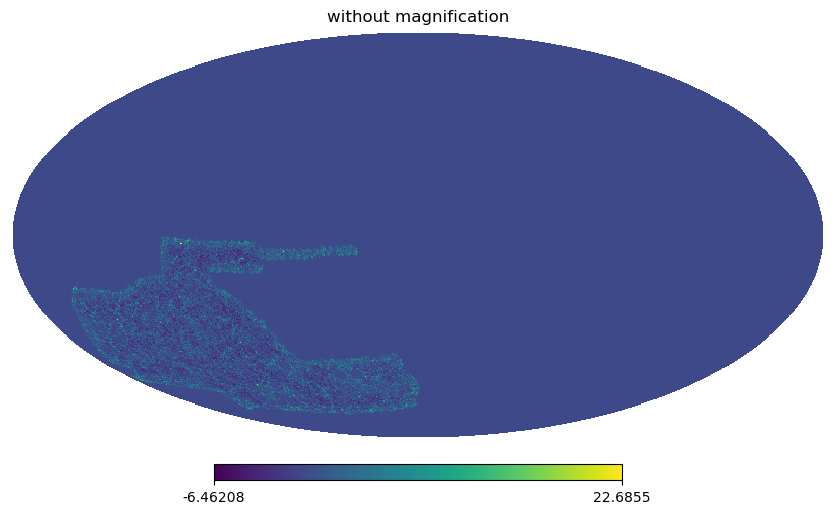

In [6]:
hp.mollview(no_mag_map, nest=True, title="without magnification")

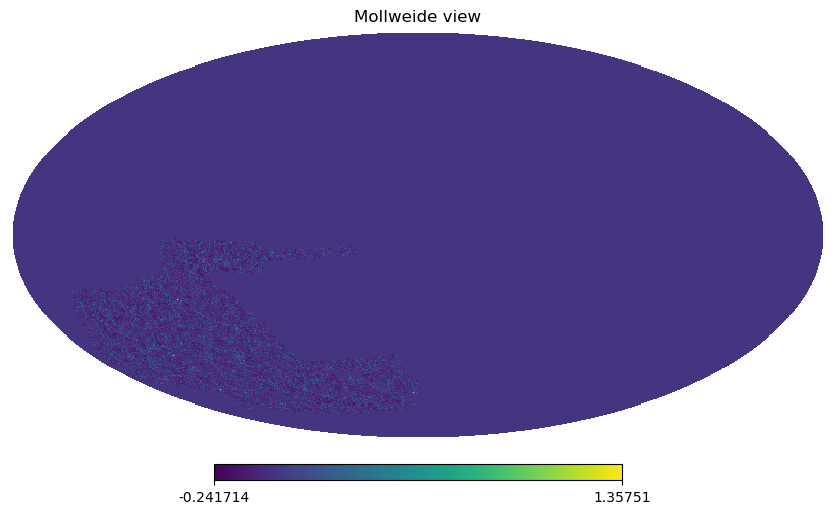

In [7]:
hp.mollview(mag_map - no_mag_map, nest=True)

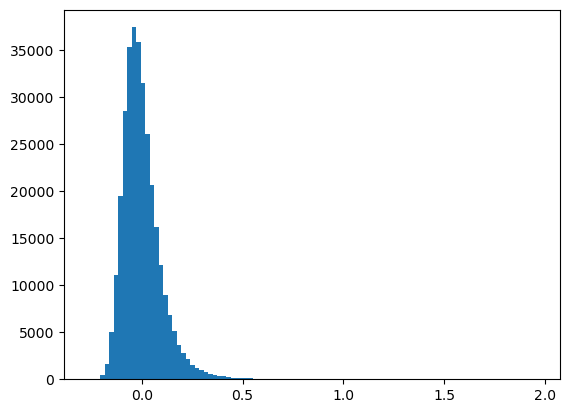

In [8]:
diff = mag_map - no_mag_map
diff = diff[diff != 0.0]
plt.hist(diff, bins=100);

# survey systematics

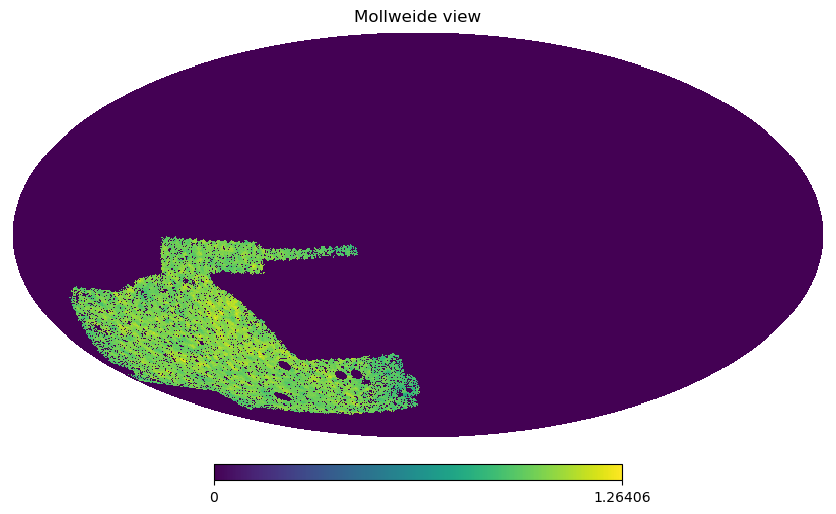

In [9]:
sys_dv = files.get_clustering_systematics(msfm_conf, pixel_type="data_vector")

sys_map = np.zeros(n_pix)
sys_map[data_vec_pix] = sys_dv[:,i_z]

hp.mollview(sys_map, nest=True)

In [10]:
sys_patch = files.get_clustering_systematics(msfm_conf, pixel_type="map")

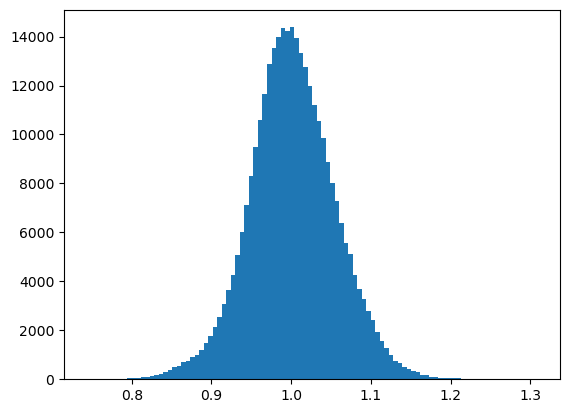

In [11]:
plt.hist(sys_patch[:,-1], bins=100);

In [12]:
np.mean(sys_patch)

1.0005608

In [2]:
from msfm.utils import cross_statistics

In [12]:
indices, names = cross_statistics.get_cross_bin_indices(
    n_z_lensing=4, n_z_clustering=4, with_lensing=True, with_clustering=True, with_cross_z=True, with_cross_probe=True
)
len(indices)

36

In [13]:
indices, names = cross_statistics.get_cross_bin_indices(
    n_z_lensing=4, n_z_clustering=4, with_lensing=True, with_clustering=True, with_cross_z=True, with_cross_probe=False
)
len(indices)

20

In [18]:
count = 0
for i in range(4):
    for j in range(4):
        if i != j:
            count += 1
            print(i,j)

print(count)

0 1
0 2
0 3
1 0
1 2
1 3
2 0
2 1
2 3
3 0
3 1
3 2
12


In [19]:
4**2 - 4

12